In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- This jupyter notebook illustrates how the `seaborn` package computes the confidence bands displayed optionally when using the `replot()` method.
- We include it in this replication document because we use the seaborn package for some illustrative plots.

In [2]:
data = sns.load_dataset("exercise")
x = data.id.values
y = data.pulse.values

Example of a `regplot`

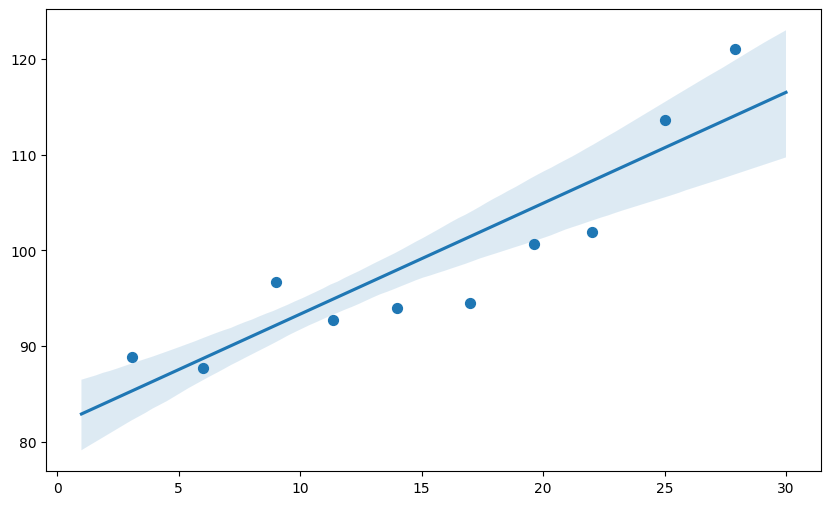

In [3]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.regplot(x=x, y=y, ci=95, x_bins=10, x_ci=False)

Explicitly replicating `seaborn`'s internals

In [4]:
grid = np.linspace(x.min(), x.max(), 100)
grdX = np.c_[np.ones(len(grid)), grid]
X    = np.c_[np.ones(len(x)), x]
b    = np.linalg.solve(X.T @ X, X.T @ y.reshape(-1,1))
yhat = (grdX @ b).reshape(-1,)

In [5]:
nboot = 10000
n     = len(x)
beta_boot = np.zeros((2, nboot))
for i in range(nboot):
    resampler = np.random.randint(0, n, n)
    xboot, yboot = X.take(resampler, axis=0), y.reshape(-1,1).take(resampler, axis=0)
    bboot    = np.linalg.solve(xboot.T @ xboot, xboot.T @ yboot)
    beta_boot[:,[i]] = bboot
yhat_boots = grdX @ beta_boot

In [6]:
pctile = 95
p = 50 - pctile / 2, 50 + pctile / 2
cis = np.nanpercentile(yhat_boots, p, axis=1)

Showing the comparison

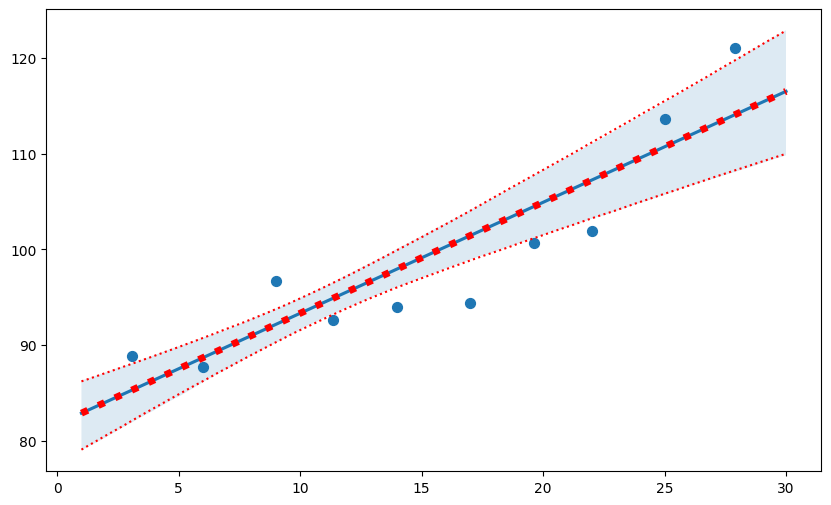

In [7]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.regplot(x=x, y=y, ci=95, x_bins=10, x_ci=False)
ax.plot(grid, yhat, linestyle=':', color='r', linewidth=5)
ax.plot(grid, cis[0,:], color='r', linestyle=':')
ax.plot(grid, cis[1,:], color='r', linestyle=':')
plt.show(f)